## Reading the data

In [1]:
# import the libraries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the dataframe csv

# add what ever the path is + DataFrame_01_12.csv, this here is my path.
dataframe = pd.read_csv("C:\\Users\\Owner\\Downloads\\CapstoneData\\DataFrame_01_12.csv") 

# The dataframe includes: What surface the road is, ID (name) of the recording 
# and features both from unfiltered signal and from signal filtered with high-pass-filter of 65 Hz threshold.

dataframe

,Surface,ID,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Wet Asphalt,2021_14_54_08-Nov-10.wav,29.546131,1023.227026,7470.0,8387.0,936.116277,1018.407771,-1.136291e-09,-1.127022e-09,1641.800213,1592.380153,1165.214212,1023.227026
1,Wet Asphalt,2021_14_54_18-Nov-10.wav,23.158067,1283.379764,8372.0,9884.0,869.158982,980.920178,-1.143832e-09,-1.131245e-09,1428.056723,1453.218214,1536.434588,1283.379763
2,Wet Asphalt,2021_14_54_28-Nov-10.wav,22.356680,1559.749380,9023.0,10466.0,978.265482,1050.050716,-1.131544e-09,-1.123459e-09,1688.413169,1527.067657,1827.613507,1559.749375
3,Wet Asphalt,2021_14_54_39-Nov-10.wav,18.413845,1917.039422,8206.0,9659.0,868.511381,999.818919,-1.143905e-09,-1.129116e-09,1434.742860,1557.996016,2310.517279,1917.039352
4,Wet Asphalt,2021_14_54_49-Nov-10.wav,17.320115,1903.750157,7371.0,9141.0,845.770818,980.018609,-1.146466e-09,-1.131346e-09,1441.429068,1511.096731,2390.523797,1903.750146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,Dry Asphalt,2021_12_11_50-Nov-22.wav,36.534334,888.469033,22574.0,23509.0,1716.408648,1765.754351,-1.121796e-09,-1.115849e-09,2077.639124,2094.478887,908.634971,888.469033
900,Dry Asphalt,2021_12_11_59-Nov-22.wav,29.227326,2105.265017,22609.0,23344.0,1726.941985,1789.627193,-1.120526e-09,-1.112972e-09,2049.099301,2059.192042,2193.910625,2105.265017
901,Dry Asphalt,2021_12_12_09-Nov-22.wav,12.354906,3569.975285,19416.0,20806.0,1423.374044,1493.428487,-1.157110e-09,-1.148668e-09,1679.621230,1625.419419,3908.569348,3569.975225
902,Dry Asphalt,2021_12_12_19-Nov-22.wav,11.684496,4516.976878,21197.0,22303.0,1498.312835,1572.473819,-1.148079e-09,-1.139142e-09,1631.718617,1628.609637,4845.935116,4516.976775


In [3]:
# Read the original signal
from scipy.io import wavfile

link = 'C:\\Users\\Owner\\Downloads\\test4_skanssi.wav'
samplerate, data = wavfile.read(link)

link = 'C:\\Users\\Owner\\Downloads\\test3_car_park_skanssi.wav'
samplerate, data2 = wavfile.read(link)

In [76]:
len(data2)

4915200

In [77]:
def slicing(sig, segment_length):   # this here will slice depending on the timeframe you give it
    sig_sliced = []                 # for example 10*fs is 10 seconds, so it will slice the signal
                                    # into 10s long segments
    for i in np.arange(int(len(sig)/segment_length)):
        sig_sliced.append( sig[i*segment_length:(i+1)*segment_length] )
        
    return (sig_sliced)

data_s = slicing(data, 9*samplerate)

data2_s = slicing(data2, 9*samplerate)

In [50]:
len(data_s[1])

396900

In [51]:
from scipy import signal
from tsfel.feature_extraction import features as tsfelf
def hpf(arr, fs, lf, order):
    wbut = lf
    bbut, abut = signal.butter(order, wbut, btype ='highpass', fs =fs)

    return signal.filtfilt(bbut, abut, arr)




In [83]:
fs = 44100

testdf, features = get_features(data_s, "Wet Asphalt2")

testdf2, features = get_features(data2_s, "Concrete")

0,1,2,3,4,5,6,7,8,9,10,11,0,1,2,3,4,5,6,7,8,9,10,11,

In [68]:
testdf

,Surface,ID,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,Wet Asphalt,0.0,33.346626,967.811870,51232.0,55776.0,4339.829993,4479.999745,-8.314211e-10,-8.139885e-10,3768.292810,3747.015749,1053.839173,967.811869
1,Wet Asphalt,1.0,28.261735,1084.117109,57102.0,64370.0,4543.591770,4715.392232,-8.060796e-10,-7.847132e-10,3881.715731,3852.135047,1219.007835,1084.117109
2,Wet Asphalt,2.0,27.447899,1023.761574,44732.0,54591.0,4027.895333,4305.072329,-8.702158e-10,-8.357438e-10,3817.064545,3795.980693,1348.198879,1023.761572
3,Wet Asphalt,3.0,38.055093,761.951965,40338.0,45200.0,3903.216429,4030.799519,-8.857218e-10,-8.698546e-10,3594.192512,3584.098467,823.765229,761.951962
4,Wet Asphalt,4.0,25.944376,1331.649103,48339.0,51502.0,4073.233489,4180.667179,-8.645772e-10,-8.512158e-10,3660.961527,3647.794260,1401.845092,1331.649085
5,Wet Asphalt,5.0,30.123791,1057.446780,48647.0,53327.0,4266.156084,4416.336220,-8.405838e-10,-8.219062e-10,3792.207338,3770.812308,1163.332100,1057.446724
6,Wet Asphalt,6.0,30.904806,944.908790,46833.0,53488.0,4088.708331,4270.044191,-8.626526e-10,-8.401002e-10,3747.490701,3729.041372,1094.548185,944.908738
7,Wet Asphalt,7.0,29.636923,1151.787225,35500.0,38402.0,3802.922195,3915.059206,-8.981952e-10,-8.842490e-10,3581.295740,3574.545066,1225.061170,1151.787225
8,Wet Asphalt,8.0,27.966505,1283.331626,56609.0,61005.0,4354.058275,4485.506092,-8.296515e-10,-8.133036e-10,3812.835628,3794.517462,1381.729058,1283.331598
9,Wet Asphalt,9.0,26.529560,1363.928819,47189.0,53063.0,3947.685935,4173.459743,-8.801912e-10,-8.521122e-10,3749.446215,3733.300059,1674.101844,1363.928818


In [4]:
alldf = dataframe


In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


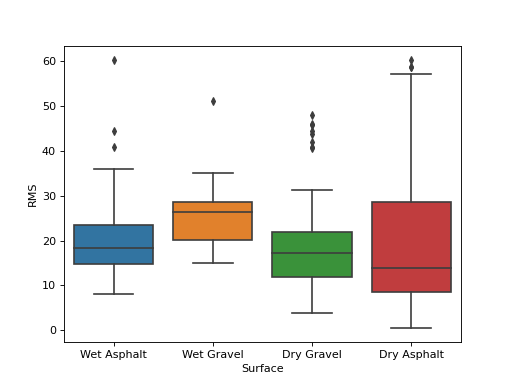

In [6]:
import seaborn as sns
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="RMS")
plt.show()

<IPython.core.display.Javascript object>


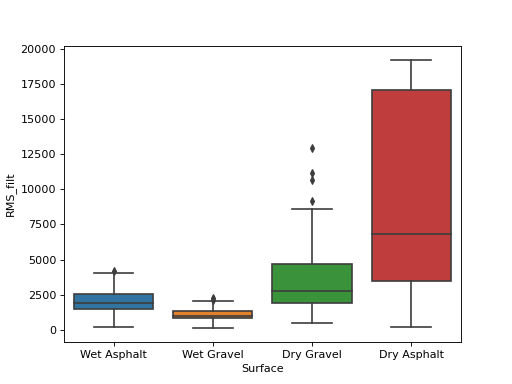

In [7]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="RMS_filt")
plt.show()

<IPython.core.display.Javascript object>


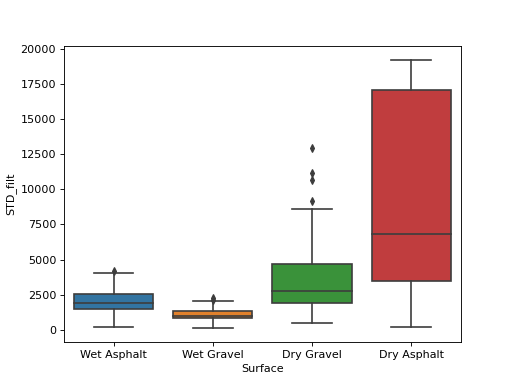

In [8]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="STD_filt")

<IPython.core.display.Javascript object>


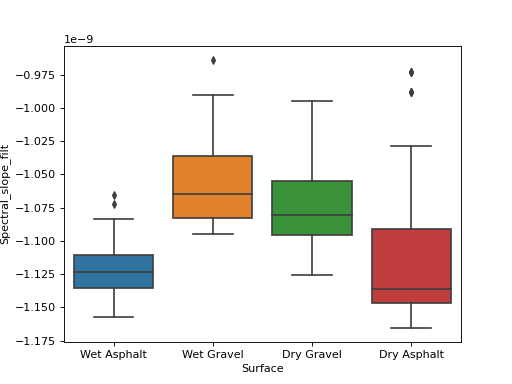

In [9]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Spectral_slope_filt")

<IPython.core.display.Javascript object>


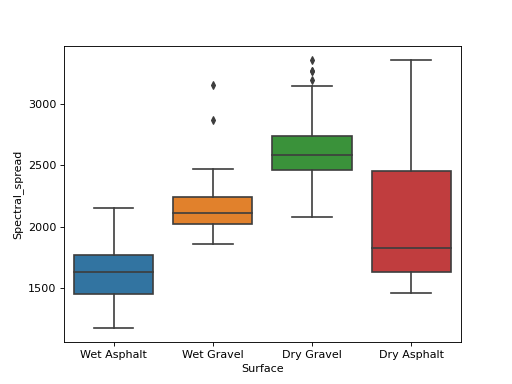

In [10]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Spectral_spread")

<IPython.core.display.Javascript object>


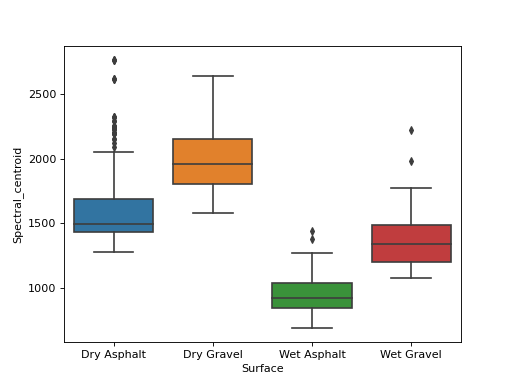

In [29]:
plt.figure()
fig = sns.boxplot(data=alldf, x="Surface", y="Spectral_centroid")

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn import tree


In [16]:
features = ['RMS',
 'RMS_filt',
 'Spectral_centroid',
 'Spectral_centroid_filt',
 'Zero-Cross',
 'Zero-Cross_filt',
 'Spectral_slope',
 'Spectral_slope_filt',
 'Spectral_spread',
 'Spectral_spread_filt',
 'STD',
 'STD_filt']

alldf = alldf.dropna()

X = alldf[features]
y = alldf["Surface"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True, stratify=None)

x_train

,RMS,RMS_filt,Spectral_centroid,Spectral_centroid_filt,Zero-Cross,Zero-Cross_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
142,15.233393,2707.373176,2129.147539,2246.547020,18355.0,19891.0,-1.072056e-09,-1.057908e-09,2935.066717,2974.019947,2970.761905,2707.373169
863,39.338080,876.582013,1495.031146,1563.080981,18143.0,20491.0,-1.148474e-09,-1.140274e-09,1820.980318,1808.813646,937.888926,876.581772
7,17.926160,2028.601993,910.509429,1007.277076,7819.0,8539.0,-1.139175e-09,-1.128276e-09,1522.452647,1594.119750,2231.838299,2028.601992
886,58.744065,215.446924,2258.092664,2306.450474,22145.0,22554.0,-1.056516e-09,-1.050689e-09,2621.159517,2607.956539,225.188410,215.446922
19,17.791204,1836.793870,880.398573,1005.196854,7372.0,9135.0,-1.142566e-09,-1.128510e-09,1505.028789,1547.782102,2235.347785,1836.793864
...,...,...,...,...,...,...,...,...,...,...,...,...
71,14.018015,2530.660669,822.128861,956.477885,6442.0,7800.0,-1.149129e-09,-1.133997e-09,1450.734489,1538.522404,3093.692294,2530.660667
106,25.981409,1336.711581,1444.523328,1563.035416,12965.0,14007.0,-1.079030e-09,-1.065682e-09,2151.396115,2190.563043,1486.847871,1336.711571
288,5.717879,6496.398351,1495.654536,1562.123957,21130.0,22115.0,-1.148399e-09,-1.140389e-09,1632.626047,1664.322526,6792.410984,6496.398351
755,8.978575,4378.947493,1439.002401,1501.776308,20642.0,21530.0,-1.155227e-09,-1.147662e-09,1541.549094,1534.553813,4622.711314,4378.947493


In [28]:
da = alldf[alldf["Surface"] =="Dry Asphalt"]
dg = alldf[alldf["Surface"] =="Dry Gravel"]
wa = alldf[alldf["Surface"] =="Wet Asphalt"]
wg = alldf[alldf["Surface"] =="Wet Gravel"]

alldf = pd.concat([da, dg, wa,wg])

In [24]:
X

,RMS,RMS_filt,Spectral_centroid,Spectral_centroid_filt,Zero-Cross,Zero-Cross_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt
0,29.546131,1023.227026,936.116277,1018.407771,7470.0,8387.0,-1.136291e-09,-1.127022e-09,1641.800213,1592.380153,1165.214212,1023.227026
1,23.158067,1283.379764,869.158982,980.920178,8372.0,9884.0,-1.143832e-09,-1.131245e-09,1428.056723,1453.218214,1536.434588,1283.379763
2,22.356680,1559.749380,978.265482,1050.050716,9023.0,10466.0,-1.131544e-09,-1.123459e-09,1688.413169,1527.067657,1827.613507,1559.749375
3,18.413845,1917.039422,868.511381,999.818919,8206.0,9659.0,-1.143905e-09,-1.129116e-09,1434.742860,1557.996016,2310.517279,1917.039352
4,17.320115,1903.750157,845.770818,980.018609,7371.0,9141.0,-1.146466e-09,-1.131346e-09,1441.429068,1511.096731,2390.523797,1903.750146
...,...,...,...,...,...,...,...,...,...,...,...,...
899,36.534334,888.469033,1716.408648,1765.754351,22574.0,23509.0,-1.121796e-09,-1.115849e-09,2077.639124,2094.478887,908.634971,888.469033
900,29.227326,2105.265017,1726.941985,1789.627193,22609.0,23344.0,-1.120526e-09,-1.112972e-09,2049.099301,2059.192042,2193.910625,2105.265017
901,12.354906,3569.975285,1423.374044,1493.428487,19416.0,20806.0,-1.157110e-09,-1.148668e-09,1679.621230,1625.419419,3908.569348,3569.975225
902,11.684496,4516.976878,1498.312835,1572.473819,21197.0,22303.0,-1.148079e-09,-1.139142e-09,1631.718617,1628.609637,4845.935116,4516.976775


In [25]:
# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)



# Extra trees classifier

forestclf = ExtraTreesClassifier(n_estimators = 500)

forestclf.fit(x_train, y_train)

y_pred_forest = forestclf.predict(x_test)


# SVC

#Create a svm Classifier
clf = sklearn.svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svc = clf.predict(x_test)


# Random Forest

rforestclf = RandomForestClassifier(n_estimators = 500)

rforestclf.fit(x_train, y_train)

y_pred_rforest = rforestclf.predict(x_test)


# Decision tree

treeclf = tree.DecisionTreeClassifier()
treeclf = clf.fit(x_train, y_train)
y_pred_tree = rforestclf.predict(x_test)



KNN confusion matrix


<IPython.core.display.Javascript object>


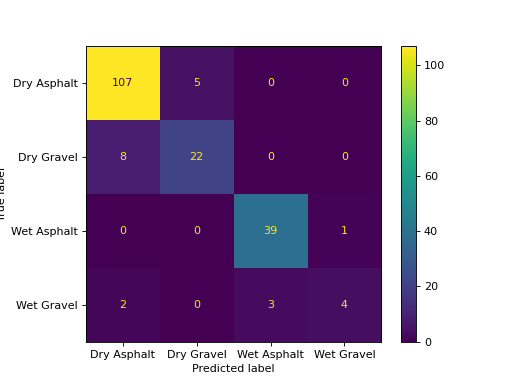

SVC confusion matrix


<IPython.core.display.Javascript object>


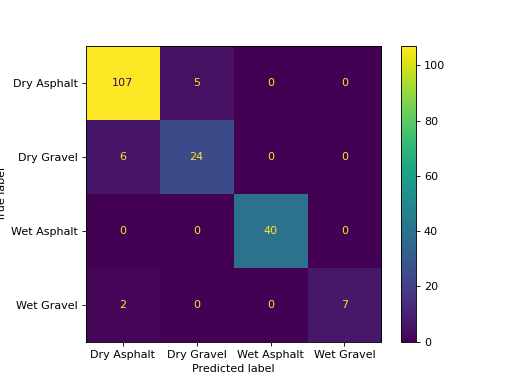

Decision tree classifier confusion matrix


<IPython.core.display.Javascript object>


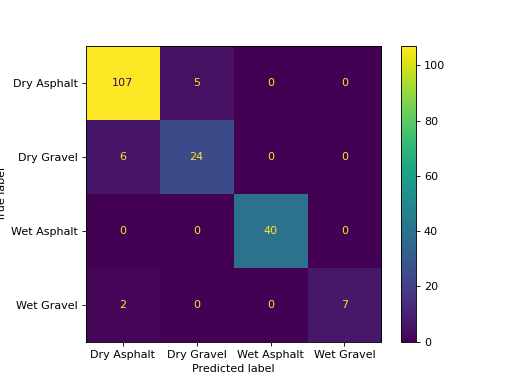

Random forest classifier confusion matrix


<IPython.core.display.Javascript object>


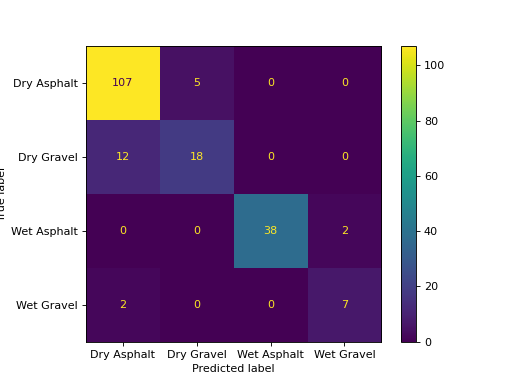

Extra trees classifier confusion matrix


<IPython.core.display.Javascript object>


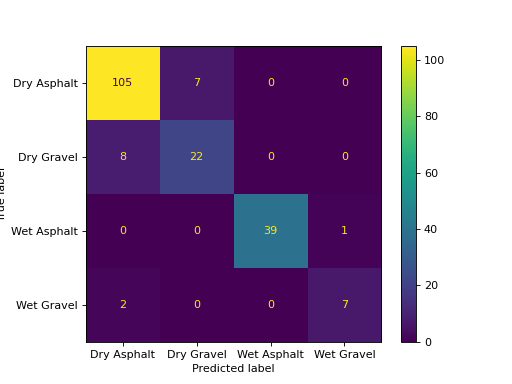

In [26]:
#%matplotlib inline

print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)
plt.show()


print("SVC confusion matrix")
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

print("Decision tree classifier confusion matrix")
plot_confusion_matrix(treeclf, x_test, y_test)
plt.show()

print("Random forest classifier confusion matrix")
plot_confusion_matrix(rforestclf, x_test, y_test)
plt.show()

print("Extra trees classifier confusion matrix")
plot_confusion_matrix(forestclf, x_test, y_test)
plt.show()



In [27]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy knn: ", np.round(accuracy_score(y_test, y_pred_knn),2))
print("Accuracy svc: ", np.round(accuracy_score(y_test, y_pred_svc),2))
print("Accuracy Tree : ", np.round(accuracy_score(y_test, y_pred_tree),2))
print("Accuracy Random forest : ", np.round(accuracy_score(y_test, y_pred_rforest),2))
print("Accuracy Extra Trees : ", np.round(accuracy_score(y_test, y_pred_forest),2))

print("----------")

print("Precision knn: ", np.round(precision_score(y_test, y_pred_knn, average='macro'),2))
print("Precision svc: ", np.round(precision_score(y_test, y_pred_svc, average = 'macro'),2))
print("Precision Tree: ", np.round(precision_score(y_test, y_pred_tree, average = 'macro'),2))
print("Precision Random Forest: ", np.round(precision_score(y_test, y_pred_rforest, average = 'macro'),2))
print("Precision trees: ", np.round(precision_score(y_test, y_pred_forest, average = 'macro'),2))

print("----------")

print("Recall knn: ", np.round(recall_score(y_test, y_pred_knn, average = 'macro'),2))
print("Recall svc: ", np.round(recall_score(y_test, y_pred_svc, average = 'macro'),2))     
print("Recall tree: ", np.round(recall_score(y_test, y_pred_tree, average = 'macro'),2))  
print("Recall forest: ", np.round(recall_score(y_test, y_pred_rforest, average = 'macro'),2))     
print("Recall trees: ", np.round(recall_score(y_test, y_pred_forest, average = 'macro'),2)) 

print("----------")
 
print("F1 knn: ", np.round(f1_score(y_test, y_pred_knn, average = 'macro'),2))
print("F1 svc: ", np.round(f1_score(y_test, y_pred_svc, average = 'macro'),2))            
print("F1 tree: ", np.round(f1_score(y_test, y_pred_tree, average = 'macro'),2))  
print("F1 forest: ", np.round(f1_score(y_test, y_pred_rforest, average = 'macro'),2))  

print("F1 trees: ", np.round(f1_score(y_test, y_pred_forest, average = 'macro'),2))  

Accuracy knn:  0.9
Accuracy svc:  0.93
Accuracy Tree :  0.89
Accuracy Random forest :  0.89
Accuracy Extra Trees :  0.91
----------
Precision knn:  0.86
Precision svc:  0.94
Precision Tree:  0.86
Precision Random Forest:  0.86
Precision trees:  0.89
----------
Recall knn:  0.78
Recall svc:  0.88
Recall tree:  0.82
Recall forest:  0.82
Recall trees:  0.86
----------
F1 knn:  0.81
F1 svc:  0.91
F1 tree:  0.84
F1 forest:  0.84
F1 trees:  0.87
